2024-04-16 11:24:36.850 | INFO     | gdsfactory.technology.layer_views:to_lyp:1018 - LayerViews written to '/tmp/gdsfactory/coupler_gap0p2_length10.lyp'.


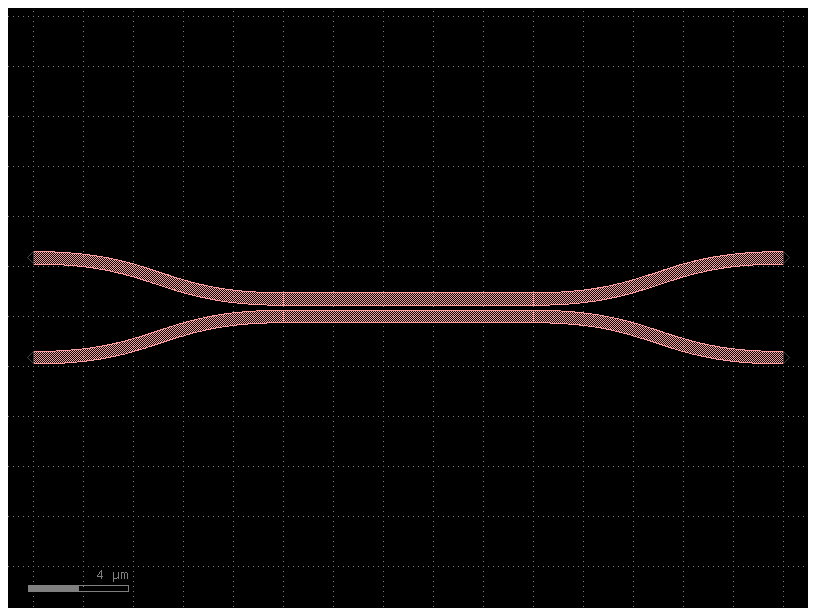

In [3]:
import gdsfactory as gf
import matplotlib.pyplot as plt
import gplugins.tidy3d as gt
from gplugins.common.config import PATH

c = gf.components.coupler(length= 10, gap=0.2)
c.plot()

In [2]:
c.ports

{'o1': {'name': 'o1', 'width': 0.5, 'center': [-10.0, -1.65], 'orientation': 180.0, 'layer': [1, 0], 'port_type': 'optical'},
 'o2': {'name': 'o2', 'width': 0.5, 'center': [-10.0, 2.35], 'orientation': 180.0, 'layer': [1, 0], 'port_type': 'optical'},
 'o3': {'name': 'o3', 'width': 0.5, 'center': [20.0, 2.35], 'orientation': 0.0, 'layer': [1, 0], 'port_type': 'optical'},
 'o4': {'name': 'o4', 'width': 0.5, 'center': [20.0, -1.65], 'orientation': 0.0, 'layer': [1, 0], 'port_type': 'optical'}}

2024-04-16 11:31:26.952 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from /home/doan/.gdsfactory/modes/WaveguideCoupler_4746897355e62e4b.npz.


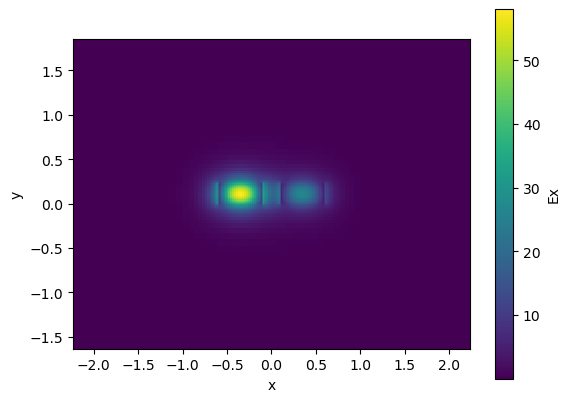

In [6]:
nm = 1e-3
cp = gt.modes.WaveguideCoupler(
    wavelength=1.55, 
    core_width=(500*nm, 500*nm), 
    gap=200*nm,
    core_thickness=220*nm,
    slab_thickness=0*nm,
    core_material="si",
    clad_material="sio2",
)

cp.plot_field(field_name="Ex", mode_index=0)

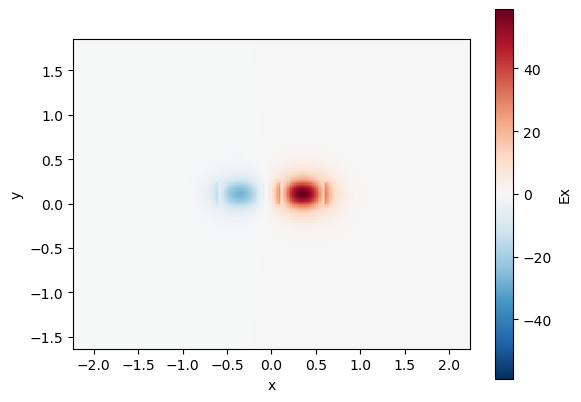

In [7]:
cp.plot_field(field_name="Ex", mode_index=1)

2024-04-16 11:37:51.515 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from /home/doan/.gdsfactory/modes/WaveguideCoupler_032867260c9e8f8a.npz.
[2.4637647 +6.57552457e-05j 2.39007229+5.06214923e-05j
 1.9225165 +1.99036730e-04j 1.71420814+2.37015946e-04j] 
 [10.5166863   3.72044606]


  0%|          | 0/15 [00:00<?, ?it/s]

2024-04-16 11:37:51.527 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from /home/doan/.gdsfactory/modes/WaveguideCoupler_e6b2997be490a9ff.npz.
2024-04-16 11:37:53.521 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/doan/.gdsfactory/modes/WaveguideCoupler_f308d577c21f6249.npz.
2024-04-16 11:37:55.220 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/doan/.gdsfactory/modes/WaveguideCoupler_39cb728c567f3a42.npz.
2024-04-16 11:37:56.907 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/doan/.gdsfactory/modes/WaveguideCoupler_6e16975c35fdf70d.npz.
2024-04-16 11:37:58.596 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/doan/.gdsfactory/modes/WaveguideCoupler_88324c2be8622e35.npz.
2024-04-16 11:38:00.370 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into /home/doan/.gdsfactory/modes/WaveguideCoupler_2a215692b256d1cc.npz.
2024-04-16 11:38:02.285 | INFO     | gplugins.tidy3d.modes:_data:305 - 

Text(0, 0.5, 'Coupling length $(\\mu m)$')

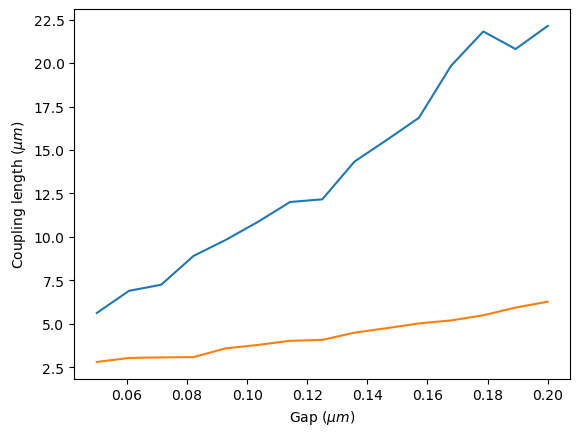

In [8]:
coupler = gt.modes.WaveguideCoupler(
    wavelength=1.55,
    core_width=(0.45, 0.45), 
    core_thickness=220*nm,
    core_material="si",
    clad_material="sio2",
    num_modes=4,
    gap=100*nm,
)

print(coupler.n_eff,"\n", coupler.coupling_length())

import numpy as np
gaps = np.linspace(0.05, 0.2, 15)
lengths = gt.modes.sweep_coupling_length(coupler, gaps)
plt.plot(gaps, lengths)
plt.xlabel(r"Gap $(\mu m)$")
plt.ylabel(r"Coupling length $(\mu m)$")


<Axes: title={'center': 'o1'}, xlabel='wavelength (nm)', ylabel='|S (dB)|'>

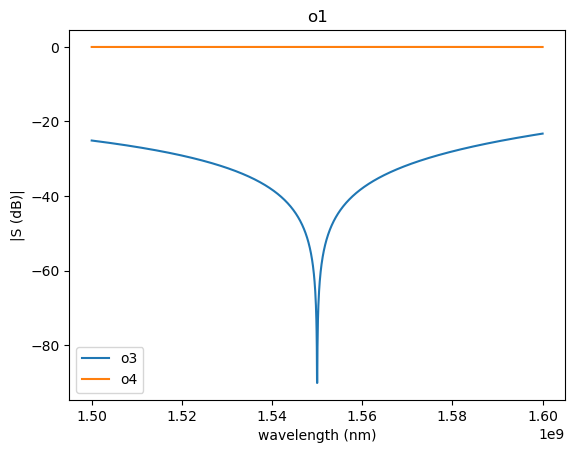

In [9]:
from functools import partial
import gplugins.sax as gs

coupler_sc = partial(gs.models.coupler, dn = 0.026, length = 0, coupling0 = 0)
gs.plot_model(coupler_sc)

<Axes: title={'center': 'o1'}, xlabel='wavelength (nm)', ylabel='|S (dB)|'>

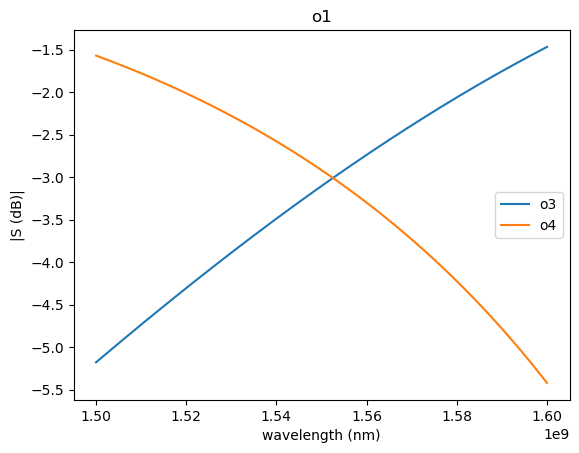

In [14]:
coupler_sc = partial(gs.models.coupler, dn = 0.026, length = 29.4/2, coupling0 = 0)
gs.plot_model(coupler_sc)